In [32]:
import pandas as pd
data_path = 'uservoice_sample.csv'
df_init = pd.read_csv(data_path)

In [33]:
import re

In [34]:
df_init.head()

,txt,txt_norm
0,"""Администратор, прошу опубликуйте! Дорогие р...","""весь также будущее по спикер дорогой ананян г..."
1,"""Почему я и мои мастера не выезжают ""посмотрет...","""заказ даже такой по ванна мастер современный ..."
2,"""16 March 2023, 23:43 Что происходит объяв...","""review всё личка такой допишешся написать 202..."
3,"""26 December, 2022 При поиске работы объяв...","""по при ранний невозможно december разработчик..."
4,"""09 February 2023, 10:25 Прошел проверку н...","""пройти review создать политика 2023 же is act..."


In [35]:
def islatin(sym):
    return sym>='a'and sym<='z'

In [36]:
def isdigit(sym):
    return sym>='0' and sym <='9'

In [37]:
isdigit('0')

True

In [38]:
df_init['txt'] = list(map(lambda x: str(x).lower(), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt'] )))
df_init['txt'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt'] )))

In [39]:
df_init['txt_norm'] = list(map(lambda x: str(x).lower(), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.replace('ё', 'е'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: re.sub('\[[^)]*\]', '', x), list(df_init['txt_norm'] )))
# records['txt_norm'] = list(map(lambda x: '"'+x+'"', list(records['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x.encode('cp1251', errors='ignore').decode('cp1251'), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: x[1:len(x)-1], list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not isdigit(w)]), list(df_init['txt_norm'] )))
df_init['txt_norm'] = list(map(lambda x: "".join([w for w in x if not islatin(w)]), list(df_init['txt_norm'] )))

In [40]:
df_init['txt_norm']

0        весь также будущее по спикер дорогой ананян го...
1        заказ даже такой по ванна мастер современный п...
2         все личка такой допишешся написать  же продав...
3        по при ранний невозможно  разработчик  один оч...
4        пройти  создать политика  же   удалить   разны...
                               ...                        
22213    легализация   все отправка придумать недалекий...
22214     решить   оценить линия   поддержка  ваш вопро...
22215     по просить   поддержка разобраться миша реакц...
22216    сфера ведение по сеть звонить коммуникабельнос...
22217    невзламывать на друг вы не заблокировать кто н...
Name: txt_norm, Length: 22218, dtype: object

In [41]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

In [42]:
# inputs = tokenizer("шляпа-доставка! авито доставка:", return_tensors="pt")
# outputs = model(**inputs)

In [43]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # multi-language model

In [44]:
sentences = df_init['txt']
embedding = model.encode(sentences, convert_to_tensor=False)
embedding.shape

(22218, 384)

In [45]:
embedding

array([[ 0.02236579, -0.07478554, -0.06094347, ..., -0.02912958,
        -0.17586197,  0.03046287],
       [ 0.03791523,  0.05426043,  0.10739622, ...,  0.05990028,
        -0.11676306, -0.10961503],
       [ 0.01612015,  0.06466454, -0.07763744, ..., -0.05076247,
         0.04882237,  0.05972154],
       ...,
       [-0.24115212,  0.10204361, -0.01274201, ...,  0.06595826,
        -0.15719214,  0.09643795],
       [ 0.00407208,  0.10857359,  0.15204513, ...,  0.0396923 ,
        -0.1384075 ,  0.20356297],
       [-0.14606604,  0.07120281,  0.19343151, ...,  0.08865872,
        -0.15563424,  0.0290323 ]], dtype=float32)

Очистка от повторяющихся супер похожих спамных и рекламных объявлений с помощью dbscan

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [47]:
# logs = []
# epsilon = 0.5
# for i in range(11):
#     print(epsilon)
    
#     dbscan = DBSCAN(eps=epsilon)
#     dbscan.fit(embedding)
#     labels = dbscan.labels_
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise_ = list(labels).count(-1)

#     print('Estimated number of clusters: %d' % n_clusters_)
#     print('Estimated number of noise points: %d' % n_noise_)
    
  
#     elements_in_class = list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1]
#     mean_elements_in_class = np.mean(elements_in_class)

#     print('Mean number of elements in class: %0.3f' % mean_elements_in_class)
#     print('Max number of elements in class: %0.3f' % np.max(elements_in_class))
#     print('Min number of elements in class: %0.3f' % np.min(elements_in_class))
    
#     sil = silhouette_score(embedding, labels)
#     print("Silhouette Coefficient: %0.3f" % sil)
    
#     print('================================')
    
#     logs.append([epsilon, n_clusters_, n_noise_, mean_elements_in_class, np.max(elements_in_class), np.min(elements_in_class), sil])
    
    
#     epsilon+=0.2

In [48]:
log_df = pd.DataFrame(logs, columns = ['eps', 'n_clusters', 'n_noise_points', 'mean n_elements', 'max n_elements','min n_elements', 'silhouette'])

In [49]:
log_df

,eps,n_clusters,n_noise_points,mean n_elements,max n_elements,min n_elements,silhouette
0,0.5,36,21583,17.638889,161,5,-0.183392
1,0.7,47,21405,17.297872,187,5,-0.193278
2,0.9,52,21161,20.326923,189,4,-0.193371
3,1.1,55,20905,23.872727,225,5,-0.206917
4,1.3,62,20466,28.258065,311,5,-0.192878
5,1.5,88,19776,27.750000,391,5,-0.206018
6,1.7,105,16871,50.923810,3802,2,-0.211542
7,1.9,52,10553,224.326923,11167,3,-0.143609
8,2.1,16,5056,1072.625000,17018,3,-0.053443
9,2.3,6,1974,3374.000000,20211,4,0.017535


In [94]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(embedding)

DBSCAN(eps=1.5)

In [51]:
elements_in_class = list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1]
np.argmax(elements_in_class)

2

In [52]:
list(sentences[[i == 8 for i in dbscan.labels_]])[2]

'здравствуйте,  \n пользователь     \n написал вам личное сообщение: \n \nа из за чего вообще опять это произошло?  \n  ответить\n на данное сообщение  \n  отписаться от новых сообщений можно в  \nличном кабинете'

In [53]:
# import numpy as np
# from sklearn import metrics


# labels = dbscan.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)

# mean_elements_in_class = np.mean(list(map(lambda i: sum(1 for ind in dbscan.labels_ if ind == i), set(dbscan.labels_)))[:-1])

# print('Mean number of elements in class: %0.3f' % mean_elements_in_class)

In [54]:
# for i, ind in enumerate(dbscan.core_sample_indices_):
#     print([sentences[ind], dbscan.labels_[ind]])

In [95]:
df_init = df_init[[i == -1 for i in dbscan.labels_]]

In [96]:
df_init.reset_index(inplace=True, drop=True)

In [83]:
df_init

,txt,txt_norm
0,"почему я и мои мастера не выезжают ""посмотреть...",заказ даже такой по ванна мастер современный п...
1,", : что происходит объявления продавцов ...",все личка такой допишешся написать же продав...
2,", при поиске работы объявления идут спис...",по при ранний невозможно разработчик один оч...
3,", : прошел проверку на двух аккаунтах с ...",пройти создать политика же удалить разны...
4,"добрый день! возможно ли такое, что работа про...",такой по столько просмотр минимум человек б...
...,...,...
20624,", приложение не работает, сообщения и пр...",заказ придумать сообщение у выдавать я нераб...
20625,", : карта местности стала коряво стала р...",бесполезно показываться работать стать ...
20626,здравствуйте еще в пятницу заблокировали профи...,по просить поддержка разобраться миша реакц...
20627,описание работодателя: требуется менеджер по п...,сфера ведение по сеть звонить коммуникабельнос...


In [97]:
sentences = sentences[[i == -1 for i in dbscan.labels_]]

In [98]:
embedding = embedding[[i == -1 for i in dbscan.labels_]]

In [99]:
sentences.reset_index(inplace=True, drop=True)
sentences

0        почему я и мои мастера не выезжают "посмотреть...
1          , :     что происходит объявления продавцов ...
2         ,      при поиске работы объявления идут спис...
3          , :     прошел проверку на двух аккаунтах с ...
4        добрый день! возможно ли такое, что работа про...
                               ...                        
19978     ,      приложение не работает, сообщения и пр...
19979      , :     карта местности стала коряво стала р...
19980    здравствуйте еще в пятницу заблокировали профи...
19981    описание работодателя: требуется менеджер по п...
19982    не кто меня не взламывал как вы не поймете это...
Name: txt, Length: 19983, dtype: object

In [61]:
len(embedding)

20905

In [62]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# kmeans_kwargs = {
#      "init": "random",
#      "n_init": 3 ,
#      "max_iter": 1000,
#      "random_state": 42,
# }

# # A list holds the SSE values for each k
# sse = []
# silhouette_coefficients = []

# for k in range(2, 21):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(embedding)
#     sse.append(kmeans.inertia_)
#     score = silhouette_score(embedding, kmeans.labels_)
#     silhouette_coefficients.append(score)
    

In [63]:
# from kneed import KneeLocator
# import matplotlib.pyplot as plt
# import numpy as np

# kl = KneeLocator(
# range(2, 21), sse, curve="convex", direction="decreasing"
# )

# print('Elbow point at ' + str(kl.elbow) + ' clusters')
# plt.plot(range(2, 21), sse)
# plt.xticks(range(2, 21))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()
# kl.plot_knee()

In [64]:
# plt.plot(range(2, 21), silhouette_coefficients)
# plt.xticks(range(2, 21))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

In [100]:
final_model = KMeans(
    init="random",
    n_clusters=14,
    n_init=20,
    max_iter=1000,
    random_state=42
    )

final_model.fit(embedding)

KMeans(init='random', max_iter=1000, n_clusters=14, n_init=20, random_state=42)

In [66]:
sentences[0]
final_model.labels_[0]

2

In [67]:
# for i,key in enumerate(list(final_model.labels_)):
#     if(key == 6):
#         print(i)
#         print(sentences[i])
#         print('--------------')

In [68]:
# [np.linalg.norm(centroids[0]-e) for e in embedding]

In [69]:
centroids = final_model.cluster_centers_
for i, center in enumerate(centroids):
    print(i)
    ind = np.argmin([np.linalg.norm(center-e) for e in embedding])
    print(sentences[ind])
    print('===========')

0
  , :     заблокировали профиль. проходишь верификацию на другом аккаунте - не получается так как пишет, что проходил в заблокированном. очень плохо. есть у меня один единственный номер, верните его пожалуйста. писал в вк ответа нет. чувствую мою проблему вы не решите, поэтому скачаю юлу. : спустя долгое время продал все то, что мне нужно и нашел квартиру на другом сервисе! авито - вы мне правда нравились... но вы будто наплевали мне в душу.            :       /: 
1
авито, мне без разницы твы заблокировали профиль б пришло письмо что какие то подозрительные сделки.предлагал. кидала ссылки на стороннюю оплату но все это бред . у меня в пути  авито доставок. профиль заблокирован. ссылки я кидал лишь мотсулими объявлениями  когда человек не хотел искать в профиле. или новое созданное для человека  для авито доставки. его сразу нельзя прикрепить сообщениях. оно там просто не отображается  обманным путем украли деньги верните все деньги  что оплачены за тариф просмотры за все  месяца. вер

In [88]:
centroids = final_model.cluster_centers_
for i, center in enumerate(centroids):
    print(i)
    ind = np.argmin([np.linalg.norm(center-e) for e in embedding])
    print(sentences[ind])
    print('===========')

0
ребята, есть два фотика пленочных, пофоткал. не очень зашло фотографирование на фотоаппараты...вот продаю. может кого заинтересует. посмотреть и заказать можно через авито. если спб, могу отправить доставкой курьером яндекса за вас счет  так же в профиле есть много вещей, если что-нибудь заинтересует, пишите либо в вк либо на авито!!! всем хорошего дня и настроения )  ://../-//____
1
 открываю запись на наставничество! старт  мая -  недель.  для тех, кто хочет приток новых клиентов, устал работать за низкий прайс и хочет больше зарабатывать.  что сделаем за  недель?  получите анализ ваших соц сетей и стратегию развития. оформите площадки вк и инстаграм * оформление от дизайнера в подарок   запустим таргет рекламу в вк для привлечения новых клиентов * профессиональный таргетолог в подарок   повысим средний чек на услуги без потери клиентов подключим и красиво оформим онлайн запись и систему лояльности для клиентов  разместимся на гео площадках яндекс и гис. сделаем правильные настройк

In [105]:
sentence_labels = []
for i in range(len(sentences)):
    sentence_labels.append([sentences[i], df_init['txt_norm'][i], embedding[i], final_model.labels_[i]])

In [106]:
sentence_labels_df = pd.DataFrame(sentence_labels, columns = ['sentence', 'norm_sent' ,'embedding', 'cluster_index'])
sentence_labels_df[20:30]

,sentence,norm_sent,embedding,cluster_index
20,", не грузятся фотографии! обновила и ни...",ничего в и не грузиться фотка фотография пер...,"[-0.059359252, -0.04178984, 0.05845806, -0.049...",9
21,", : фото приложение не грузит фото. п...",листать мера приложение тупить ле...,"[-0.109888576, 0.1504324, 0.06485387, 0.112482...",9
22,здравствуйте. не получается дозвониться в вашу...,техподдержка личка снимать так именно комната ...,"[0.03623296, 0.11120635, -0.004689417, 0.01773...",9
23,исправите уже наконец поиск - объявления в нов...,пройти иркутск по наконец при исправить город ...,"[0.14883022, -0.26735553, -0.0017146841, -0.05...",13
24,тема: \nвремя: .. в : (+) \nсобытие: пришло с...,техподдержка мама время дорогой так же тема ...,"[0.17632805, 0.043457706, -0.08745389, -0.0093...",13
25,"здравствуйте, у моего мужа заблокировался акка...",заказ появиться отправить муж подтверждение р...,"[0.03900304, 0.122995794, -0.2770392, -0.03525...",6
26,здравствуйте! рассмотрите пожалуйста возможнос...,пожалуйста избранный категория вернуть спасибо...,"[-0.09553714, 0.020552745, 0.12987073, 0.12687...",8
27,"кто желает писать отзывы авито по рублей, янд...",отзыв по желать яндекс присоединяться писать...,"[-0.28169742, -0.19663589, -0.05729916, -0.071...",12
28,", вылетает учетная запись. много раз пи...",убрать служба все шаблонный превью просмотр ...,"[-0.17101805, -0.25781098, -0.06797808, -0.168...",10
29,в энгельсе продают любвеобильных енотов на с...,дрессировка область дальнейший пользователь по...,"[0.12095468, -0.13496637, -0.07953863, 0.10459...",13


In [91]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn import decomposition

In [102]:
features_matrix = []
for tensor in embedding:
    features_matrix.append([float(elem) for elem in tensor])

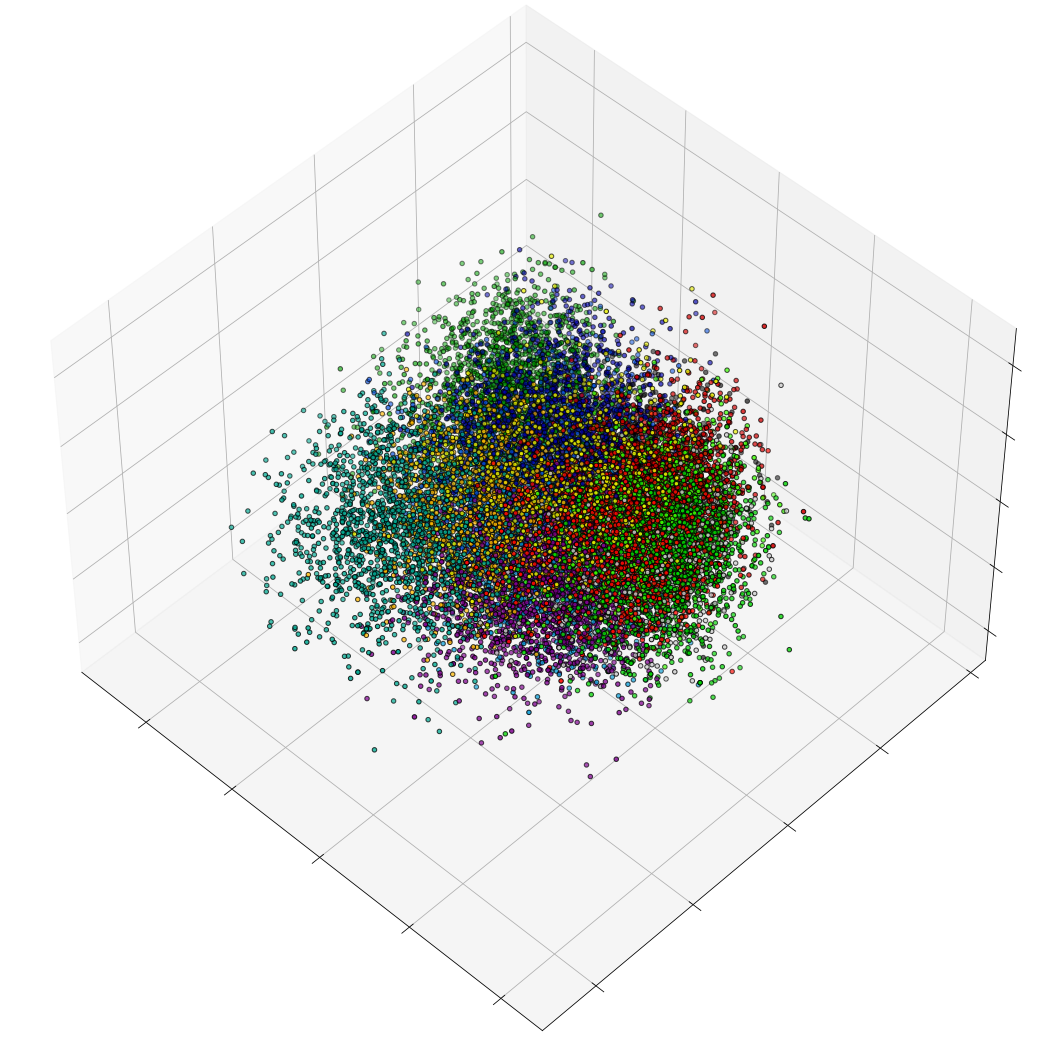

In [107]:
fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features_matrix)
X = pca.transform(features_matrix)

# Reorder the labels to have colors matching the cluster results
y = sentence_labels_df['cluster_index']
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


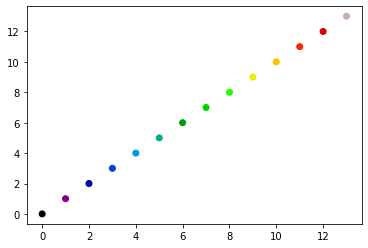

In [114]:
from mycolorpy import colorlist as mcp
color1=mcp.gen_color_normalized(cmap='nipy_spectral',data_arr=range(14))
plt.scatter(range(14),range(14),c=color1)

In [109]:
{label: dict() for label in list(set(final_model.labels_))}

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 10: {},
 11: {},
 12: {},
 13: {}}

In [108]:
stopw = ['такой','свой','мой', 'ваш', 'какой', 'уже', 'тот', 'нет', 'быть', 'cам', 'один', 'вообще', 'стать', 'очень', 'который', 'там', 'раз', 'каждый', 'какой', 'че', 'наш', 'весь', 'есть','этот']

In [ ]:
print('весь' in stopw)

In [110]:
import pymorphy2
def getfreq(sentence_labels_df, final_model):
    morph = pymorphy2.MorphAnalyzer()
    labels = final_model.labels_
    freq_dict = {label: dict() for label in list(set(labels))}
    for i, sent in enumerate(sentence_labels_df['norm_sent']):
        sent = set(sent.split(' '))
        for word in sent:
            w = morph.parse(word)[0]
            if (not w.tag.POS in ('PREP', 'PRCL', 'CONJ', 'NPRO', 'INTJ',  None)) and (not word in stopw):
                cluster_index = sentence_labels_df['cluster_index'][i]
                if word in freq_dict[cluster_index].keys():
                    freq_dict[cluster_index][word]+=1
                else:
                    freq_dict[cluster_index][word]=1 
    return freq_dict

In [111]:
freq_dict = getfreq(sentence_labels_df,final_model)

In [112]:
def printtopN(freq_dict, N, final_model):
    for tag in list(set(final_model.labels_)):
        print(tag)
        for w in sorted(freq_dict[tag], key=freq_dict[tag].get, reverse=True)[:N]:
            print(w, freq_dict[tag][w])
        print('=============')

In [113]:
printtopN(freq_dict, 10, final_model)

0
авить 934
доставка 869
деньга 788
товар 599
заказ 579
день 482
покупатель 407
поддержка 381
объявление 338
продавец 335
1
объявление 1112
авить 564
реклама 499
товар 344
приложение 332
поиск 286
деньга 277
продажа 259
только 247
размещение 242
2
сообщение 615
авить 580
объявление 579
написать 545
можно 400
пользователь 395
новый 358
отзыв 357
личный 354
поддержка 341
3
телефон 443
номер 423
авить 389
объявление 306
приложение 253
звонок 224
звонить 212
немочь 209
поддержка 167
сообщение 161
4
авить 898
объявление 575
деньга 543
мошенник 499
человек 452
поддержка 447
отзыв 357
писать 312
заблокировать 305
только 305
5
приложение 1462
объявление 436
обновление 307
работать 304
авить 265
постоянно 210
проблема 209
поиск 196
неработать 195
избранный 173
6
аккаунт 1125
заблокировать 1099
профиль 1048
авить 772
номер 518
объявление 507
немочь 446
телефон 387
поддержка 384
проверка 379
7
авить 1021
доставка 528
цена 472
можно 286
товар 278
продажа 268
год 257
мочь 249
новый 237
хороший 225


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def build_corpus(freq_dict, final_model):
    corpus = []
    for tag in list(set(final_model.labels_)):
        tag_str = ' '.join(list(map(lambda x: (x+' ')*freq_dict[tag][x],freq_dict[tag].keys())))
        corpus.append(tag_str)
    return corpus

In [ ]:
corpus = build_corpus(freq_dict, final_model)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = list(set(final_model.labels_)))
tfidf_df 

In [ ]:
def printtopNTFIDF(freq_dict,N, final_model):
    for tag in list(set(final_model.labels_)):
        print(tag)
        for i in sorted(tfidf_df.loc[tag].index, key = tfidf_df.loc[tag].get, reverse=True)[:N]:
            print(i, tfidf_df.loc[tag][i])
        print("======")

In [ ]:
printtopNTFIDF(freq_dict, 10, final_model)

In [ ]:
# df2 = pd.DataFrame(list(final_model.labels_))
# df2 = df2.rename(columns={0: "cluster_index"})
# df2

# df_final = pd.concat([df_init, df2], sort=False, axis = 1)
# df_final['cluster_index'] +=1
# df_final.head()

# indexes = df_final['cluster_index']

# indexes = pd.get_dummies(indexes)
# for ind in range(num_cluster):
#     indexes = indexes.rename(columns={ind: f"is_in_cluster_{ind}"})
# # indexes = indexes.rename(columns={1: "is_in_cluster_1", 2: "is_in_cluster_2"})

# df_binary_feature = pd.concat([df_final, indexes], sort=False, axis = 1)
# df_binary_feature.head()

In [ ]:
df_init.to_csv('df_after_dbscan.csv')

In [ ]:
df_embedding = pd.DataFrame(columns = ['sentence', 'embedding', 'cluster_index'])
df_embedding['sentence'] = list(sentences)
df_embedding['embedding'] = list(embedding)
df_embedding['cluster_index']=list(sentence_labels_df['cluster_index'])

In [ ]:
df_embedding.to_csv('embedding_after_dbscan.csv')